In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def load_data(outfolder):
    """ Loads the .csv files saved to the out folder and returns them as one data frame """ 
    data = pd.DataFrame()
    type_dict ={'a1': "Evaluation",   'a2': "Argumentation", 
            'a3': "Discussion",   'a4': "Literature", 
            'a5': "Culture",      'b1': "Discussion",
            'b2': "Argumentation",'b3': "Linguistics",
            'b4': "Literature",   'b5': "Literature",
            'b6': "Discussion", 'b7': "Discussion",
            'b8': "Evaluation", 'c1': "Literature"}
    for file in sorted(os.listdir(outfolder)):
        if file.endswith(".csv"):
            dat = pd.read_csv(os.path.join(outfolder, file), index_col=0)
            dat["subfolder"] = file.split(".")[0]
            dat["term"] = file[0]
            data = pd.concat([data, dat])
    data['Type'] = data['subfolder'].map(type_dict)
    return data
data = load_data("out")

In [10]:
data

,Filename,RelFreq NOUN,RelFreq VERB,RelFreq ADJ,RelFreq ADV,Unique PER,Unique LOC,Unique ORG,subfolder,term,Type
0,100,1524.48,1216.78,797.20,531.47,0,0,0,a1,a,Evaluation
1,101,1161.05,1235.96,599.25,836.45,1,0,0,a1,a,Evaluation
2,102,1477.95,1191.90,679.38,476.76,1,0,0,a1,a,Evaluation
3,103,1092.72,1357.62,596.03,573.95,1,0,1,a1,a,Evaluation
4,104,1314.50,1191.65,577.40,675.68,0,1,2,a1,a,Evaluation
...,...,...,...,...,...,...,...,...,...,...,...
2,200,1177.94,1017.54,646.62,506.27,17,0,8,c1,c,Literature
3,219,1385.22,969.66,560.69,481.53,26,0,6,c1,c,Literature
4,238,1093.87,1155.93,395.66,287.04,19,0,3,c1,c,Literature
5,501,1238.88,1019.85,458.59,424.37,14,0,5,c1,c,Literature


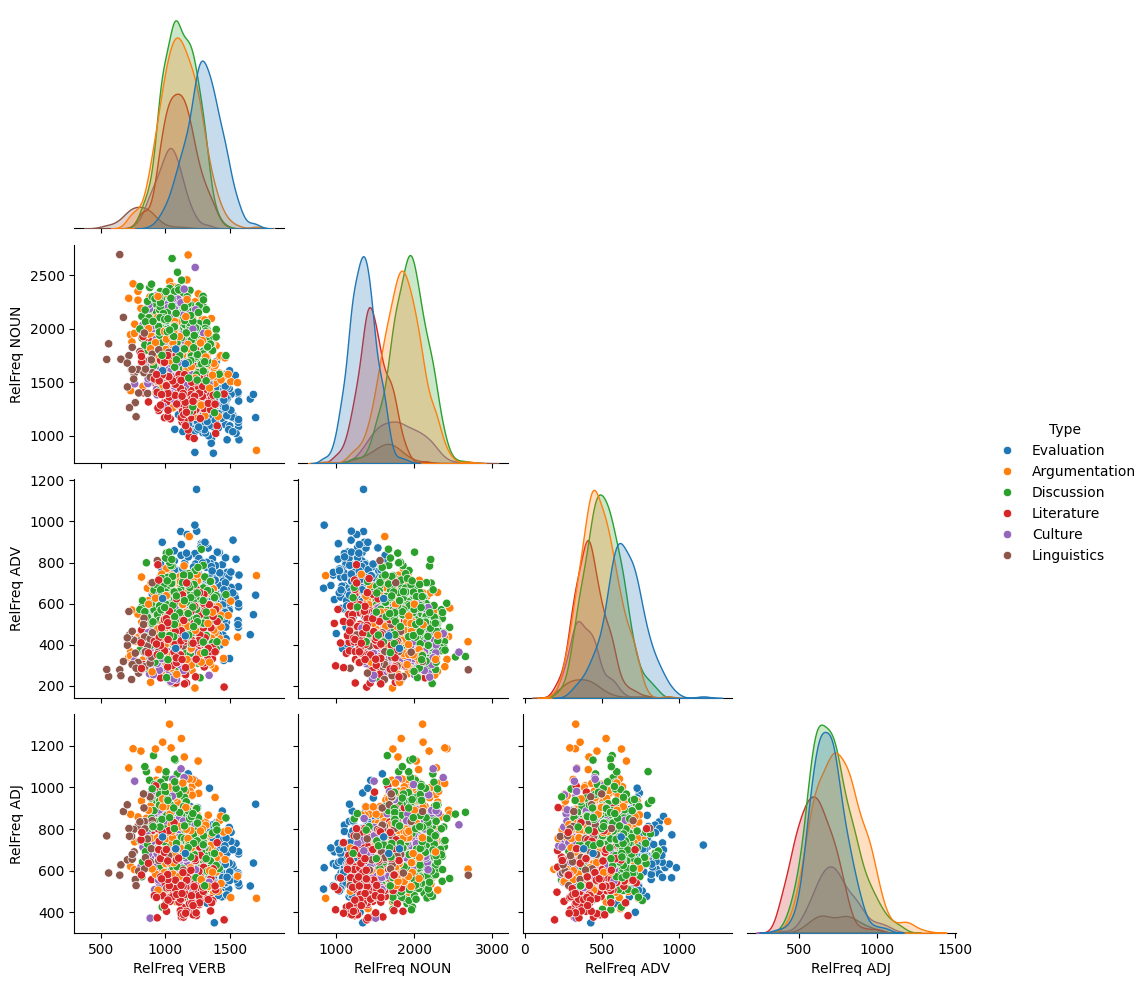

In [11]:
def pairplot_POStype(data, outpath):
    """ Saves a plot of the named parts of speech found in the essays in relative frequencies, coloured by type of text """
    sns.pairplot(data, 
                 hue="Type", 
                 vars=["RelFreq VERB", "RelFreq NOUN", "RelFreq ADV", "RelFreq ADJ"], 
                 kind = "scatter", 
                 corner = True)
    plt.savefig(os.path.join(outpath, "pair_POStype.png"))
pairplot_POStype(data, "out/plots")